In [2]:
pip install mord

  Preparing metadata (setup.py) ... done
  Created wheel for mord: filename=mord-0.7-py3-none-any.whl size=9885 sha256=cb5eeac664ede46e6cff17369a0649a1ba3c8de5369910408a88804eea981f27
  Stored in directory: /root/.cache/pip/wheels/77/00/19/3cea86fbfc737ec4acb515cd94497dcc33f943fa157548b96c
Successfully built mord


In [1]:
import joblib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import gridspec
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 16 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

NameError: ignored

In [2]:
plt.rc('font', family='NanumBarunGothic')

# 새 섹션

In [ ]:
data = [[0, 0, 0, 0, 8, 1, 3, 5, 6, 8, 2],
        [1, 3, 5, 6, 8, 1, 3, 5, 6, 8, 0],
        [1, 0, 5, 6, 8, 0, 3, 5, 6, 8, 3],
        [1, 3, 5, 6, 8, 1, 3, 0, 6, 8, 4],
        [1, 3, 5, 6, 8, 1, 3, 5, 6, 8, 1]]

labels = ['Label 1', 'Label 2', 'Label 3', 'Label 4', 'Label 5']

x_values = list(range(1, 12))

# 누적 막대 그래프 그리기
bottom = np.zeros(len(x_values))  # 초기 bottom 값을 0으로 설정

for i in range(len(data)):
    plt.bar(x_values, data[i], bottom=bottom, align='center')
    bottom += data[i]  # 다음 누적을 위해 bottom 값 업데이트

plt.xlabel('X Values')
plt.ylabel('Y Values')
plt.title('Stacked Bar Graph by Labels')
plt.xticks(x_values, range(0, 11))
plt.legend(labels)
plt.show()

In [ ]:
file = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/final_data.csv')

[[6, 9], [0, 3], [5, 19], [14, 47], [35, 80], [85, 349], [193, 682], [500, 2446], [241, 728], [21, 78], [5, 15]]


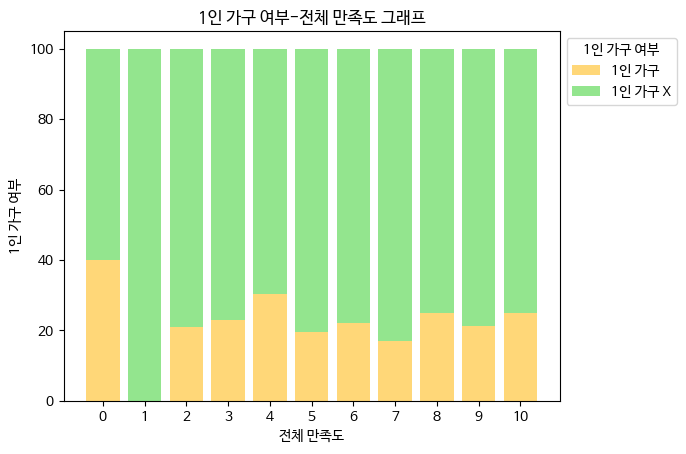

In [104]:
X_name = '전체 만족도'
Y_name = '1인 가구 여부'
X_sat = 'sat_all'
Y_val = 'live_alone'
labels = ['1인 가구', '1인 가구 X']
max_val = 2

bar_colors = [
    (255 / 255, 0 / 255, 0 / 255, 0.5),
    (255 / 255, 159 / 255, 64 / 255, 0.5),
    (255 / 255, 51 / 255, 222 / 255, 0.5),
    (153 / 255, 51 / 255, 0 / 255, 0.5),
    (255 / 255, 206 / 255, 86 / 255, 0.5),
    (40 / 255, 205 / 255, 30 / 255, 0.5),
    (75 / 255, 192 / 255, 192 / 255, 0.5),
    (102 / 255, 204 / 255, 255 / 255, 0.5),
    (54 / 255, 162 / 255, 235 / 255, 0.5),
    (153 / 255, 102 / 255, 255 / 255, 0.5)
]

# 결과값을 저장할 리스트 초기화
result_rows = []

# sat_health 값이 0부터 10까지 반복
for sat_value in range(0, 11):
    y_finterd = file.loc[file[X_sat] == sat_value, Y_val]

    # 1~5 사이의 모든 값에 대한 등장 횟수를 0으로 초기화한 Series 생성
    counts = pd.Series(0, index=range(1, max_val+1))

    # y_finterd에 대한 등장 횟수 계산
    for value in y_finterd:
        counts[value] += 1

    counts_row = counts.tolist()
    result_rows.append(counts_row)

print(result_rows)

# 비율로 변환
total_counts = [sum(row) for row in result_rows]

# 각 배열의 값을 비율로 변환하여 저장
percentage_rows = []
for row, total_count in zip(result_rows, total_counts):
    percentage_row = [(count / total_count) * 100 for count in row]
    percentage_rows.append(percentage_row)

graph_data = np.array(percentage_rows).T.tolist()

x_values = list(range(1, 12))

# 누적 막대 그래프 그리기
bottom = np.zeros(len(x_values))  # 초기 bottom 값을 0으로 설정

for i in range(len(graph_data)):
    plt.bar(x_values, graph_data[i], bottom=bottom, align='center', color=bar_colors[i+4])
    bottom += graph_data[i]  # 다음 누적을 위해 bottom 값 업데이트

plt.xlabel(X_name)
plt.ylabel(Y_name)
plt.title(Y_name+'-'+X_name+' 그래프')
plt.xticks(x_values, range(0, 11))
plt.legend(labels, title=Y_name, bbox_to_anchor=(1, 1))
plt.show()

[[0, 15], [1, 2], [1, 23], [0, 61], [2, 113], [12, 422], [35, 840], [165, 2781], [153, 816], [13, 86], [3, 17]]


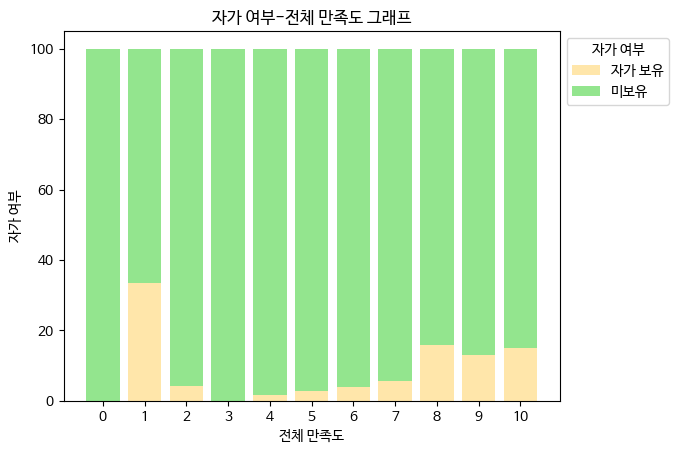

In [61]:
X_name = '전체 만족도'
Y_name = '자가 여부'
X_sat = 'sat_all'
Y_val = 'house'
labels = ['자가 보유', '미보유']
max_val = 2

bar_colors = [
    (255 / 255, 0 / 255, 0 / 255, 0.5),
    (255 / 255, 159 / 255, 64 / 255, 0.5),
    (255 / 255, 51 / 255, 222 / 255, 0.5),
    (153 / 255, 51 / 255, 0 / 255, 0.5),
    (255 / 255, 206 / 255, 86 / 255, 0.5),
    (40 / 255, 205 / 255, 30 / 255, 0.5),
    (75 / 255, 192 / 255, 192 / 255, 0.5),
    (102 / 255, 204 / 255, 255 / 255, 0.5),
    (54 / 255, 162 / 255, 235 / 255, 0.5),
    (153 / 255, 102 / 255, 255 / 255, 0.5)
]

# 결과값을 저장할 리스트 초기화
result_rows = []

# sat_health 값이 0부터 10까지 반복
for sat_value in range(0, 11):
    y_finterd = file.loc[file[X_sat] == sat_value, Y_val]

    # 1~5 사이의 모든 값에 대한 등장 횟수를 0으로 초기화한 Series 생성
    counts = pd.Series(0, index=range(1, max_val+1))

    # y_finterd에 대한 등장 횟수 계산
    for value in y_finterd:
        counts[value] += 1

    counts_row = counts.tolist()
    result_rows.append(counts_row)

print(result_rows)

# 비율로 변환
total_counts = [sum(row) for row in result_rows]

# 각 배열의 값을 비율로 변환하여 저장
percentage_rows = []
for row, total_count in zip(result_rows, total_counts):
    percentage_row = [(count / total_count) * 100 for count in row]
    percentage_rows.append(percentage_row)

graph_data = np.array(percentage_rows).T.tolist()

x_values = list(range(1, 12))

# 누적 막대 그래프 그리기
bottom = np.zeros(len(x_values))  # 초기 bottom 값을 0으로 설정

for i in range(len(graph_data)):
    plt.bar(x_values, graph_data[i], bottom=bottom, align='center', color=bar_colors[i+4])
    bottom += graph_data[i]  # 다음 누적을 위해 bottom 값 업데이트

plt.xlabel(X_name)
plt.ylabel(Y_name)
plt.title(Y_name+'-'+X_name+' 그래프')
plt.xticks(x_values, range(0, 11))
plt.legend(labels, title=Y_name, bbox_to_anchor=(1, 1))
plt.show()

[[0, 16], [1, 14], [2, 53], [3, 88], [7, 286], [18, 1426], [46, 691], [189, 2217], [105, 308], [11, 53], [3, 24]]


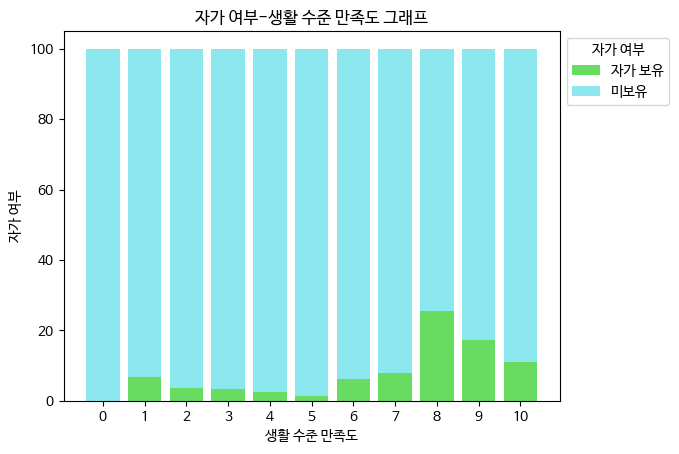

In [88]:
X_name = '생활 수준 만족도'
Y_name = '자가 여부'
X_sat = 'sat_living'
Y_val = 'house'
labels = ['자가 보유', '미보유']
max_val = 2

bar_colors = [
    (255 / 255, 0 / 255, 0 / 255, 0.5),
    (255 / 255, 159 / 255, 64 / 255, 0.5),
    (255 / 255, 51 / 255, 222 / 255, 0.5),
    (153 / 255, 51 / 255, 0 / 255, 0.5),
    (255 / 255, 206 / 255, 86 / 255, 0.5),
    (40 / 255, 205 / 255, 30 / 255, 0.7),
    (92 / 255, 222 / 255, 233 / 255, 0.7),
    (153 / 255, 102 / 255, 255 / 255, 0.5)
]

# 결과값을 저장할 리스트 초기화
result_rows = []

# sat_health 값이 0부터 10까지 반복
for sat_value in range(0, 11):
    y_finterd = file.loc[file[X_sat] == sat_value, Y_val]

    # 1~5 사이의 모든 값에 대한 등장 횟수를 0으로 초기화한 Series 생성
    counts = pd.Series(0, index=range(1, max_val+1))

    # y_finterd에 대한 등장 횟수 계산
    for value in y_finterd:
        counts[value] += 1

    counts_row = counts.tolist()
    result_rows.append(counts_row)

print(result_rows)

# 비율로 변환
total_counts = [sum(row) for row in result_rows]

# 각 배열의 값을 비율로 변환하여 저장
percentage_rows = []
for row, total_count in zip(result_rows, total_counts):
    percentage_row = [(count / total_count) * 100 for count in row]
    percentage_rows.append(percentage_row)

graph_data = np.array(percentage_rows).T.tolist()

x_values = list(range(1, 12))

# 누적 막대 그래프 그리기
bottom = np.zeros(len(x_values))  # 초기 bottom 값을 0으로 설정

for i in range(len(graph_data)):
    plt.bar(x_values, graph_data[i], bottom=bottom, align='center', color=bar_colors[i+5])
    bottom += graph_data[i]  # 다음 누적을 위해 bottom 값 업데이트

plt.xlabel(X_name)
plt.ylabel(Y_name)
plt.title(Y_name+'-'+X_name+' 그래프')
plt.xticks(x_values, range(0, 11))
plt.legend(labels, title=Y_name, bbox_to_anchor=(1, 1))
plt.show()

[[2, 14], [4, 11], [13, 42], [14, 77], [78, 215], [347, 1097], [125, 612], [244, 2162], [99, 314], [8, 56], [4, 23]]


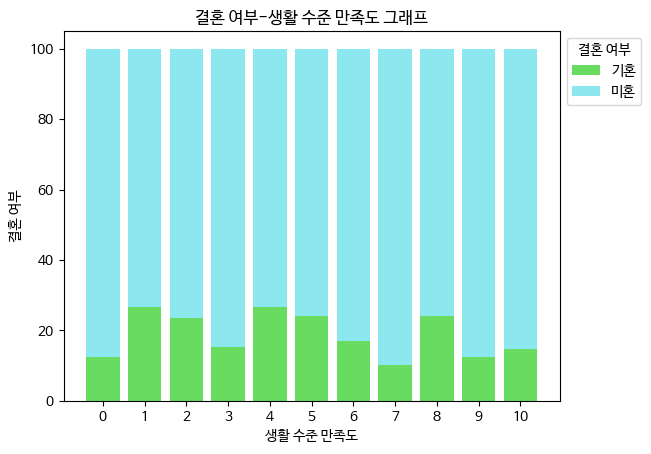

In [89]:
X_name = '생활 수준 만족도'
Y_name = '결혼 여부'
X_sat = 'sat_living'
Y_val = 'marriage'
labels = ['기혼', '미혼']
max_val = 2

bar_colors = [
    (255 / 255, 0 / 255, 0 / 255, 0.5),
    (255 / 255, 159 / 255, 64 / 255, 0.5),
    (255 / 255, 51 / 255, 222 / 255, 0.5),
    (153 / 255, 51 / 255, 0 / 255, 0.5),
    (255 / 255, 206 / 255, 86 / 255, 0.5),
    (40 / 255, 205 / 255, 30 / 255, 0.7),
    (92 / 255, 222 / 255, 233 / 255, 0.7),
    (153 / 255, 102 / 255, 255 / 255, 0.5)
]

# 결과값을 저장할 리스트 초기화
result_rows = []

# sat_health 값이 0부터 10까지 반복
for sat_value in range(0, 11):
    y_finterd = file.loc[file[X_sat] == sat_value, Y_val]

    # 1~5 사이의 모든 값에 대한 등장 횟수를 0으로 초기화한 Series 생성
    counts = pd.Series(0, index=range(1, max_val+1))

    # y_finterd에 대한 등장 횟수 계산
    for value in y_finterd:
        counts[value] += 1

    counts_row = counts.tolist()
    result_rows.append(counts_row)

print(result_rows)

# 비율로 변환
total_counts = [sum(row) for row in result_rows]

# 각 배열의 값을 비율로 변환하여 저장
percentage_rows = []
for row, total_count in zip(result_rows, total_counts):
    percentage_row = [(count / total_count) * 100 for count in row]
    percentage_rows.append(percentage_row)

graph_data = np.array(percentage_rows).T.tolist()

x_values = list(range(1, 12))

# 누적 막대 그래프 그리기
bottom = np.zeros(len(x_values))  # 초기 bottom 값을 0으로 설정

for i in range(len(graph_data)):
    plt.bar(x_values, graph_data[i], bottom=bottom, align='center', color=bar_colors[i+5])
    bottom += graph_data[i]  # 다음 누적을 위해 bottom 값 업데이트

plt.xlabel(X_name)
plt.ylabel(Y_name)
plt.title(Y_name+'-'+X_name+' 그래프')
plt.xticks(x_values, range(0, 11))
plt.legend(labels, title=Y_name, bbox_to_anchor=(1, 1))
plt.show()

[[4, 6, 1, 1, 0], [4, 7, 0, 2, 0], [7, 13, 6, 2, 1], [6, 70, 23, 5, 0], [0, 17, 55, 26, 0], [0, 13, 248, 85, 0], [1, 3, 76, 160, 2], [0, 0, 93, 558, 3], [0, 2, 46, 2296, 2], [0, 0, 7, 411, 1041], [0, 0, 2, 44, 212]]


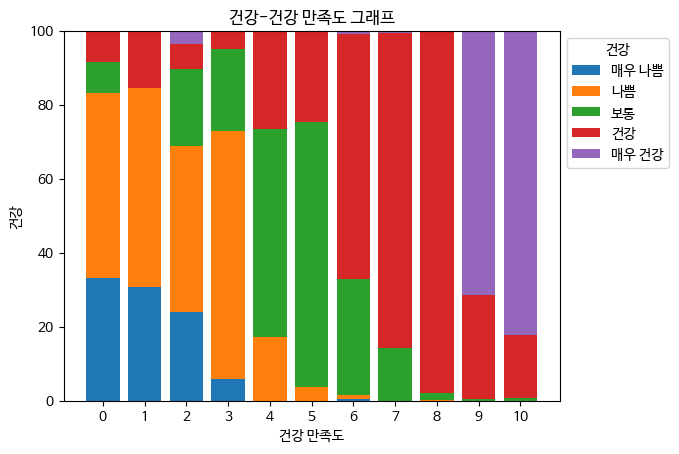

In [39]:
X_name = '건강 만족도'
Y_name = '건강'
X_sat = 'sat_health'
Y_val = 'health'
labels = ['매우 나쁨', '나쁨', '보통', '건강', '매우 건강']
max_val = 5

# 결과값을 저장할 리스트 초기화
result_rows = []

# sat_health 값이 0부터 10까지 반복
for sat_value in range(0, 11):
    y_finterd = file.loc[file[X_sat] == sat_value, Y_val]

    # 1~5 사이의 모든 값에 대한 등장 횟수를 0으로 초기화한 Series 생성
    counts = pd.Series(0, index=range(1, max_val+1))

    # y_finterd에 대한 등장 횟수 계산
    for value in y_finterd:
        counts[value] += 1

    counts_row = counts.tolist()
    result_rows.append(counts_row)

print(result_rows)

# 비율로 변환
total_counts = [sum(row) for row in result_rows]

# 각 배열의 값을 비율로 변환하여 저장
percentage_rows = []
for row, total_count in zip(result_rows, total_counts):
    percentage_row = [(count / total_count) * 100 for count in row]
    percentage_rows.append(percentage_row)

graph_data = np.array(percentage_rows).T.tolist()

x_values = list(range(1, 12))

# 누적 막대 그래프 그리기
bottom = np.zeros(len(x_values))  # 초기 bottom 값을 0으로 설정

for i in range(len(graph_data)):
    plt.bar(x_values, graph_data[i], bottom=bottom, align='center')
    bottom += graph_data[i]  # 다음 누적을 위해 bottom 값 업데이트

plt.xlabel(X_name)
plt.ylabel(Y_name)
plt.title(Y_name+'-'+X_name+' 그래프')
plt.xticks(x_values, range(0, 11))
plt.legend(labels, title=Y_name, bbox_to_anchor=(1, 1))
plt.show()

[[0, 12], [3, 10], [1, 28], [21, 83], [27, 71], [68, 278], [51, 191], [122, 532], [411, 1935], [206, 1253], [28, 230]]


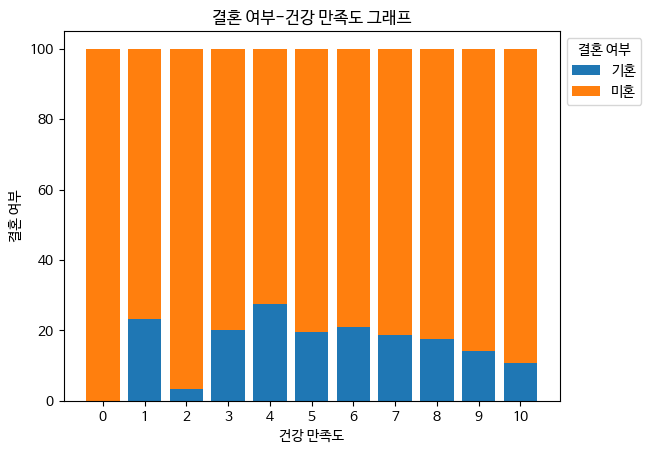

In [40]:
X_name = '건강 만족도'
Y_name = '결혼 여부'
X_sat = 'sat_health'
Y_val = 'marriage'
labels = ['기혼', '미혼']
max_val = 2

# 결과값을 저장할 리스트 초기화
result_rows = []

# sat_health 값이 0부터 10까지 반복
for sat_value in range(0, 11):
    y_finterd = file.loc[file[X_sat] == sat_value, Y_val]

    # 1~5 사이의 모든 값에 대한 등장 횟수를 0으로 초기화한 Series 생성
    counts = pd.Series(0, index=range(1, max_val+1))

    # y_finterd에 대한 등장 횟수 계산
    for value in y_finterd:
        counts[value] += 1

    counts_row = counts.tolist()
    result_rows.append(counts_row)

print(result_rows)

# 비율로 변환
total_counts = [sum(row) for row in result_rows]

# 각 배열의 값을 비율로 변환하여 저장
percentage_rows = []
for row, total_count in zip(result_rows, total_counts):
    percentage_row = [(count / total_count) * 100 for count in row]
    percentage_rows.append(percentage_row)

graph_data = np.array(percentage_rows).T.tolist()

x_values = list(range(1, 12))

# 누적 막대 그래프 그리기
bottom = np.zeros(len(x_values))  # 초기 bottom 값을 0으로 설정

for i in range(len(graph_data)):
    plt.bar(x_values, graph_data[i], bottom=bottom, align='center')
    bottom += graph_data[i]  # 다음 누적을 위해 bottom 값 업데이트

plt.xlabel(X_name)
plt.ylabel(Y_name)
plt.title(Y_name+'-'+X_name+' 그래프')
plt.xticks(x_values, range(0, 11))
plt.legend(labels, title=Y_name, bbox_to_anchor=(1, 1))
plt.show()

[[0, 1, 3], [2, 0, 0], [2, 1, 1], [9, 3, 7], [18, 7, 29], [122, 15, 89], [270, 41, 162], [738, 146, 570], [2068, 91, 871], [145, 10, 83], [30, 5, 22]]


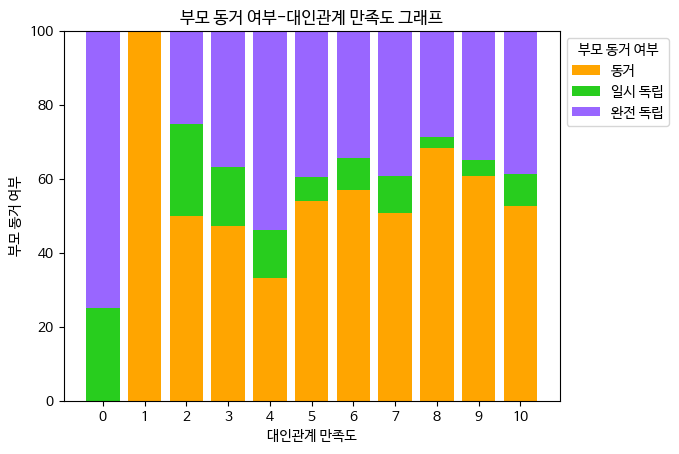

In [101]:
X_name = '대인관계 만족도'
Y_name = '부모 동거 여부'
X_sat = 'sat_human'
Y_val = 'parents'
labels = ['동거', '일시 독립', '완전 독립']
max_val = 3

bar_colors = ['orange', (40 / 255, 205 / 255, 30 / 255), (153/255, 102/255, 255/255)]

# 결과값을 저장할 리스트 초기화
result_rows = []

# sat_health 값이 0부터 10까지 반복
for sat_value in range(0, 11):
    y_finterd = file.loc[file[X_sat] == sat_value, Y_val]

    # 1~5 사이의 모든 값에 대한 등장 횟수를 0으로 초기화한 Series 생성
    counts = pd.Series(0, index=range(1, max_val+1))

    # y_finterd에 대한 등장 횟수 계산
    for value in y_finterd:
        counts[value] += 1

    counts_row = counts.tolist()
    result_rows.append(counts_row)

print(result_rows)

# 비율로 변환
total_counts = [sum(row) for row in result_rows]

# 각 배열의 값을 비율로 변환하여 저장
percentage_rows = []
for row, total_count in zip(result_rows, total_counts):
    percentage_row = [(count / total_count) * 100 for count in row]
    percentage_rows.append(percentage_row)

graph_data = np.array(percentage_rows).T.tolist()

x_values = list(range(1, 12))

# 누적 막대 그래프 그리기
bottom = np.zeros(len(x_values))  # 초기 bottom 값을 0으로 설정

for i in range(len(graph_data)):
    plt.bar(x_values, graph_data[i], bottom=bottom, align='center', color=bar_colors[i])
    bottom += graph_data[i]  # 다음 누적을 위해 bottom 값 업데이트

plt.xlabel(X_name)
plt.ylabel(Y_name)
plt.title(Y_name+'-'+X_name+' 그래프')
plt.xticks(x_values, range(0, 11))
plt.legend(labels, title=Y_name, bbox_to_anchor=(1, 1))
plt.show()

[[1, 3], [0, 2], [3, 1], [8, 11], [26, 28], [136, 90], [283, 190], [813, 641], [2399, 631], [182, 56], [42, 15]]


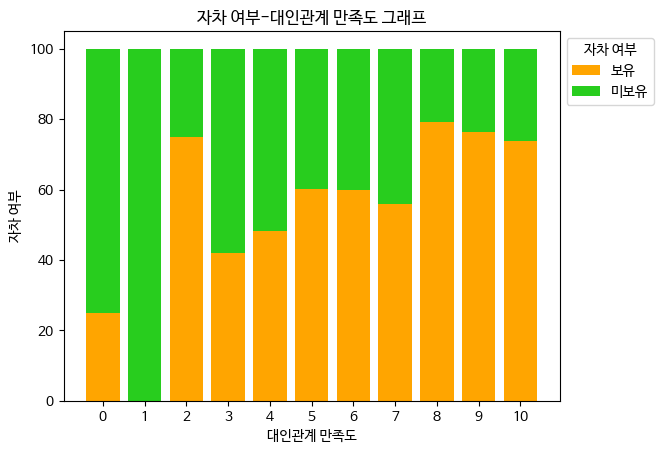

In [102]:
X_name = '대인관계 만족도'
Y_name = '자차 여부'
X_sat = 'sat_human'
Y_val = 'car'
labels = ['보유', '미보유']
max_val = 2

bar_colors = ['orange', (40 / 255, 205 / 255, 30 / 255), (153/255, 102/255, 255/255)]

# 결과값을 저장할 리스트 초기화
result_rows = []

# sat_health 값이 0부터 10까지 반복
for sat_value in range(0, 11):
    y_finterd = file.loc[file[X_sat] == sat_value, Y_val]

    # 1~5 사이의 모든 값에 대한 등장 횟수를 0으로 초기화한 Series 생성
    counts = pd.Series(0, index=range(1, max_val+1))

    # y_finterd에 대한 등장 횟수 계산
    for value in y_finterd:
        counts[value] += 1

    counts_row = counts.tolist()
    result_rows.append(counts_row)

print(result_rows)

# 비율로 변환
total_counts = [sum(row) for row in result_rows]

# 각 배열의 값을 비율로 변환하여 저장
percentage_rows = []
for row, total_count in zip(result_rows, total_counts):
    percentage_row = [(count / total_count) * 100 for count in row]
    percentage_rows.append(percentage_row)

graph_data = np.array(percentage_rows).T.tolist()

x_values = list(range(1, 12))

# 누적 막대 그래프 그리기
bottom = np.zeros(len(x_values))  # 초기 bottom 값을 0으로 설정

for i in range(len(graph_data)):
    plt.bar(x_values, graph_data[i], bottom=bottom, align='center',  color=bar_colors[i])
    bottom += graph_data[i]  # 다음 누적을 위해 bottom 값 업데이트

plt.xlabel(X_name)
plt.ylabel(Y_name)
plt.title(Y_name+'-'+X_name+' 그래프')
plt.xticks(x_values, range(0, 11))
plt.legend(labels, title=Y_name, bbox_to_anchor=(1, 1))
plt.show()